# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 5

Do wykonania laboratorium można skorzystać z bibliotek/modułów:
- [numpy](https://numpy.org/)
- [matplotlib](https://matplotlib.org/)
- [pandas](https://pandas.pydata.org/)
- [collections](https://docs.python.org/3/library/collections.html)


### Zadanie 1

Wczytaj plik `english.10MB`
> Podpowiedź: Kodowanie `iso-8859-1`



In [1]:
import collections

In [2]:
my_file = open("english.10mb", encoding='iso-8859-1')
data = my_file.read()

data_into_list = data.replace('\n', ' ').split(" ")

my_file.close()
print(len(data_into_list))

2029461


In [3]:

data = data.replace('\n', ' ')
                    

### Zadanie 2
Zamień wszystkie litery na małe.


In [4]:
data = data.lower()


### Zadanie 3
Znajdź unikalne litery (pomiń inne znaki) w tekście i dla każdej przypisz liczbę wystąpień, a następnie wyświetl histogram.

Pytanie: Jaka litera występuje najczęściej?

> Podpowiedź: `import string`


In [5]:
import string
letters = string.ascii_lowercase

counter = {}
for i in letters:
    count = data.count(i)
    counter[i] = count 


for let in counter:
    print(f'{let}: {counter[let]}')

a: 687143
b: 116039
c: 171074
d: 391087
e: 1001102
f: 190105
g: 149672
h: 590005
i: 532158
j: 12678
k: 71097
l: 311298
m: 211476
n: 562896
o: 569730
p: 124510
q: 8304
r: 453054
s: 494323
t: 713888
u: 203343
v: 70530
w: 191303
x: 9636
y: 141607
z: 11132


<BarContainer object of 26 artists>

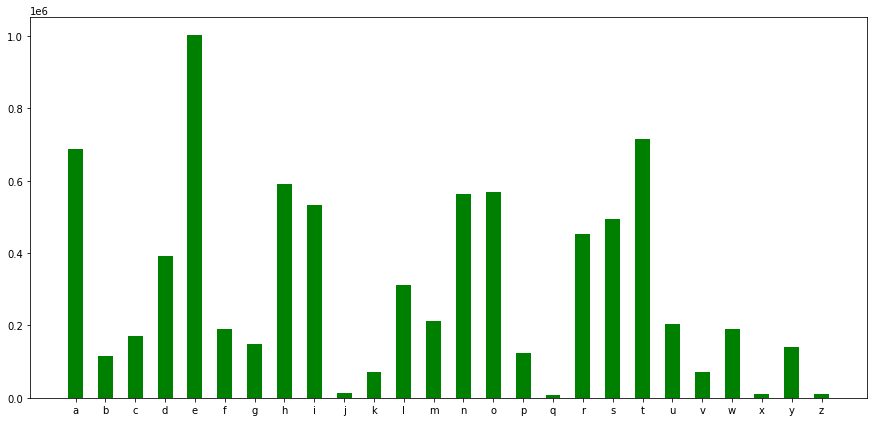

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
plt.bar(list(counter.keys()), counter.values(), color='g', width=.5)

### Zadanie 4

Napisz funkcję, która dla podanego prefiksu (ciąg liter, np. `th` to prefiks o długości 2) zwróci listę maksymalnie pięciu liter, które mają największe prawdopodobieństwo wystąpienia po nim.

```python
In : nast('th', s) # th - prefiks, s - tekst
Out: ['e', 'a', 'i', 'o', 'y']
```



In [7]:
def nast(th, s):
    words = s.split(' ')
    words = list(filter(None, words))
    
    with_prefix = [x for x in words if x.startswith(th)]
    
    no_prefix= []
    for i in range(len(with_prefix)):
        no_prefix.append(with_prefix[i].removeprefix(th))
    
    let = ''
    for word in no_prefix:
        try:
            let += word[0]
        except IndexError:
            pass
        
    counter = {}
    for i in letters:
        count = let.count(i)
        counter[i] = count 
        
    sorted_counter={}
    sorted_counter= sorted(counter.items(), key=lambda x: x[1])
    
    lett = []
    for i in range(5):
        if sorted_counter[-i-1][1] > 0:
            lett.append(sorted_counter[-i-1][0])
    
    return  lett

a = nast('they', data)
a

[]

### Zadanie 5

Napisz kod, który wczytuje kolejne znaki od użytkownika i podpowiada następne możliwe litery (maksymalnie pięć). Wykorzystaj funkcję zaimplementowaną w poprzednim zadaniu.

> Podpowiedź: Możesz wykorzystać funkcję `input()` do wczytywania znaków.

Przykład działania:
```
Nacisnij <ENTER> aby zakonczyc.
Podaj litere: f
Podaj kolejną literę (możliwe: ['o', 'a', 'r', 'e', 'i']): fo
Podaj kolejną literę (możliwe: ['r', 'u', 'l', 'o', 'x']): for
Podaj kolejną literę (możliwe: ['e', 't', 'm', 'g', 'c']): fore
Podaj kolejną literę (możliwe: ['s', 'h', 'i', 'g', 'v']): fores
Podaj kolejną literę (możliwe: ['t', 'a', 'e', 'i', 'k']): forest
Podaj kolejną literę (możliwe: ['s', 'a']): forests
```

In [8]:
x = input('Podaj litere: ')
while len(nast(x,data))>0:
    x = x + input('Podaj kolejną literę (możliwe: ' + str(nast(x,data))+': '+x)


Podaj litere: t
Podaj kolejną literę (możliwe: ['h', 'o', 'r', 'i', 'a']: th
Podaj kolejną literę (możliwe: ['e', 'a', 'i', 'o', 'y']: the
Podaj kolejną literę (możliwe: ['y', 'm', 'e', 'n', 'r']: they



### Zadanie 6

Wykonaj zadanie podobne do zad. 6, ale na poziomie słów. Dla ułatwienia słowa można wybierać z listy za pomocą liczb 1-5.

In [9]:
def nextword(w, s):
    words = s.split(' ')
    words = list(filter(None, words))
    indices = [i for i, x in enumerate(words) if x == w]
    
    nextw = []
    for i in indices:
        nextw.append(words[i+1])
    
    counter = {}
    for w in nextw :
        count = nextw.count(w)
        counter[w] = count 
    
    sorted_counter={}
    sorted_counter= sorted(counter.items(), key=lambda x: x[1])
    
    most = []
    for i in range(5):
        if sorted_counter[-i-1][1] > 0:
            most.append(sorted_counter[-i-1][0])


    return most

a = nextword('they', data)
print(a)


['were', 'had', 'are', 'came', 'will']


In [10]:
x = input('Podaj słowo: ')
y = nextword(x,data)

string = x

while len(y)>0:
    x = input('Podaj numer kolejnego słowa (możliwe: ' + str(y)+': '+string)
    x = y[int(x)-1]
    string += ' '
    string += x
    y = nextword(x,data)

Podaj słowo: they
Podaj numer kolejnego słowa (możliwe: ['were', 'had', 'are', 'came', 'will']: they4
Podaj numer kolejnego słowa (możliwe: ['to', 'up', 'in', 'out', 'the']: they came4
Podaj numer kolejnego słowa (możliwe: ['of', 'to', 'and', 'the', 'with']: they came out1


KeyboardInterrupt: Interrupted by user